In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import yfinance as yf
import time
import matplotlib.pyplot as plt
import pandas_ta as ta
from preprocessing import *

[autoreload of dateutil.tz._factories failed: Traceback (most recent call last):
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: can't apply this __setattr__ to _TzSingleton object
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of typing_extensions failed: Traceback (most recent call last):
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 365, in update_class
    update_instances(old, new)
  File "c:\Users\manat\anaconda3\envs\180a-env\Lib\site-packages\IPython\extensions\autoreload.py", line 323, in update_instances
    object.__setattr__(ref, "__class__", new)
TypeError: can't apply this __setattr__ to _ProtocolMeta object
]
[autoreload of dateutil.rrule failed: Traceback (most 

In [5]:
stock_symbols = list(set([
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "JPM", "JNJ",
    "V", "PG", "UNH", "HD", "DIS", "PYPL", "MA", "NFLX", "VZ", "INTC",
    "CMCSA", "ADBE", "XOM", "PEP", "CSCO", "NFLX", "NKE", "T", "MRK", "ABT",
    "CRM", "AVGO", "NFLX", "NVS", "TMO", "WMT", "QCOM", "IBM", "COST", "PM",
    "TXN", "HON", "LLY", "AMD", "INTU", "SBUX", "AMGN", "ISRG", "MDT", "LMT",
    "CHTR", "NOW", "MMM", "GILD", "SYK", "DHR", "CAT", "ZTS", "LRCX", "NEM",
    "TGT", "MS", "SYY", "BA",  "BKNG", "SPGI", "ADP", "FIS", "USB",
    "LNT", "VRTX", "PNC", "C", "COP", "QCOM", "EXC", "GD", "MMC", "KMB",
    "APD", "EL", "CI", "SO", "CL", "FISV", "ADI", "NTRS", "TROW", "MCO",
    "HIG", "AON", "ICE", "DLTR", "PGR", "TRV", "RMD", "D", "MSCI", "WBA",
    "RMD", "NDAQ", "ADSK", "VLO", "IQV", "REGN", "DTE", "ETR", "FMC", "PH",
    "NDAQ"
] + pd.read_csv('../data/filtered_tickers.csv')['Ticker'].to_list()))

In [6]:
start = '2019-01-01'
end = '2024-09-30'
stock_train_dic = preprocess(stock_symbols, start, end, train = True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
stock_train_dic['AAPL']

,Date,Open,High,Low,Close,Adj Close,Volume,ema_10,ema_25,ema_50,...,target,ema_rec_short,ema_rec_long,hma_rec_short,hma_rec_long,rsi_rec,macd_rec,mom_rec,bbands_rec,ao_rec
108,2019-06-07,46.627499,47.980000,46.442501,47.537498,45.774899,122737600,45.693973,46.587228,46.930122,...,1,-1,-1,-2,0,0,1,1,1,-1
109,2019-06-10,47.952499,48.842499,47.904999,48.145000,46.359875,104883600,46.139614,46.707056,46.977765,...,1,-2,-2,-1,-1,0,2,1,1,-1
110,2019-06-11,48.715000,49.000000,48.400002,48.702499,46.896709,107731600,46.605593,46.860552,47.045401,...,0,-2,-2,-1,-1,0,2,1,1,-1
111,2019-06-12,48.487499,48.992500,48.347500,48.547501,46.747459,73012800,46.958667,46.990317,47.104307,...,0,-2,-2,-1,-1,0,2,1,0,0
112,2019-06-13,48.674999,49.197498,48.400002,48.537498,46.737823,86698400,47.245727,47.109331,47.160511,...,0,-2,-2,-1,-1,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2024-09-20,229.970001,233.089996,227.619995,228.199997,227.949203,318679900,223.264278,222.680416,220.043261,...,0,-2,-2,-1,0,0,2,2,1,0
1440,2024-09-23,227.339996,229.449997,225.809998,226.470001,226.221115,54146000,223.847137,222.971922,220.295290,...,1,0,-2,-1,0,0,2,2,0,1
1441,2024-09-24,228.649994,229.350006,225.729996,227.369995,227.120117,43556100,224.487657,223.310236,220.572730,...,0,0,-2,-1,0,0,2,2,0,1
1442,2024-09-25,224.929993,227.289993,224.020004,226.369995,226.121216,42308700,224.829900,223.545602,220.800073,...,1,0,-2,0,0,0,2,1,-1,1


In [8]:
data = stock_train_dic[stock_symbols[0]]
for x in stock_symbols[1:]:
    data = pd.concat([data,stock_train_dic[x]])
data.shape

(276986, 42)

In [9]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ema_10',
       'ema_25', 'ema_50', 'ema_100', 'hma_10', 'hma_25', 'hma_50', 'hma_100',
       'macd', 'macd_h', 'macd_s', 'rsi', 'momentum', 'BBL', 'BBM', 'BBU',
       'BBB', 'BBP', 'ao', 'adx', 'dmp', 'dmn', 'chop', 'pct_change',
       'pct_change_shift', 'target', 'ema_rec_short', 'ema_rec_long',
       'hma_rec_short', 'hma_rec_long', 'rsi_rec', 'macd_rec', 'mom_rec',
       'bbands_rec', 'ao_rec'],
      dtype='object')

In [10]:

from sklearn.model_selection import train_test_split
train_columns_rec = ['ema_rec_short', 'ema_rec_long', 'hma_rec_short', 'hma_rec_long',
       'rsi_rec', 'macd_rec', 'mom_rec', 'bbands_rec', 'ao_rec', 'chop', 'adx', 'pct_change']
train_columns_raw = ['Close', 'ema_10','ema_25', 'ema_50', 'ema_100', 'hma_10', 'hma_25', 'hma_50', 'hma_100', 
                 'macd', 'macd_h', 'macd_s', 'rsi', 'momentum', 'ao', 'adx', 'dmp', 'dmn', 'chop', 'pct_change']
X_train, X_test, y_train, y_test = train_test_split(data[train_columns_rec], data['target'], test_size=.1, shuffle = True)

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRegressor

xgb_clf = XGBClassifier(objective = "binary:logistic", n_estimators = 300, learning_rate = 0.05, max_depth = 12, gamma = 0, min_child_weight = 10, scale_pos_weight = 0.95)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)
preds 

array([0, 1, 0, ..., 1, 1, 0])

In [12]:
xgb_clf.predict_proba(X_test)

array([[0.52276576, 0.47723424],
       [0.4937061 , 0.5062939 ],
       [0.5241701 , 0.4758299 ],
       ...,
       [0.3983137 , 0.6016863 ],
       [0.39760542, 0.6023946 ],
       [0.5087008 , 0.4912992 ]], dtype=float32)

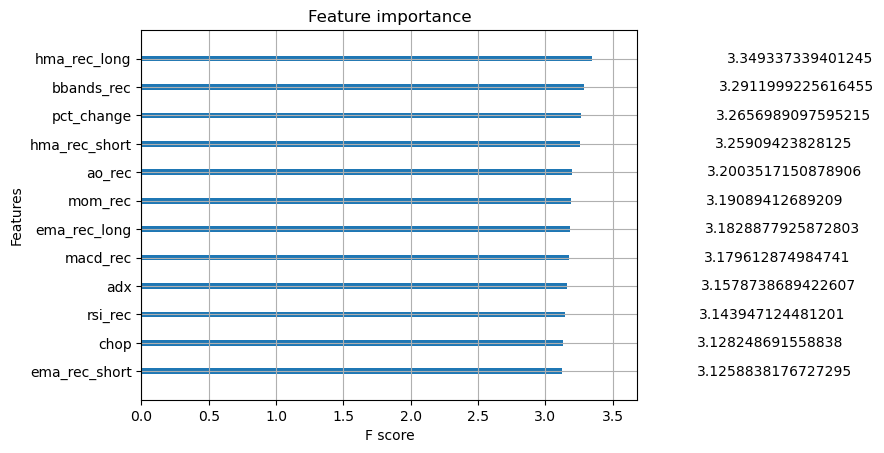

In [13]:
from xgboost import plot_importance
plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

In [14]:
(((y_test.to_numpy() - 0.5)*(preds - 0.5)) > 0).mean()

0.5142784938084407

In [15]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
conf = precision_recall_fscore_support(y_test, preds)
print(f"precision: {conf[0]}")
print(f"recall: {conf[1]}")
print(f"f1: {conf[2]}")
confusion_matrix(y_test, preds)

precision: [0.50161439 0.5254918 ]
recall: [0.48347659 0.54354714]
f1: [0.49237851 0.534367  ]


array([[6525, 6971],
       [6483, 7720]], dtype=int64)

In [17]:
start = '2024-04-25'
end = '2024-10-26'
stocks_100 = pd.read_csv('../data/filtered_tickers.csv')['Ticker']
pre_stocks_100 = preprocess(stocks_100, start, end, train = False)
pre_stocks_100['ABEV']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Date,Open,High,Low,Close,Adj Close,Volume,ema_10,ema_25,ema_50,...,pct_change,ema_rec_short,ema_rec_long,hma_rec_short,hma_rec_long,rsi_rec,macd_rec,mom_rec,bbands_rec,ao_rec
108,2024-09-30,2.39,2.44,2.38,2.44,2.44,37342700,2.366642,2.339090,2.304208,...,0.016667,-2,-2,-2,-2,-1,1,0,1,0
109,2024-10-01,2.48,2.53,2.47,2.50,2.50,51018700,2.390889,2.351468,2.311886,...,0.024590,-2,-2,-2,-2,-1,1,0,1,0
110,2024-10-02,2.54,2.56,2.52,2.56,2.56,84412800,2.421637,2.367509,2.321616,...,0.024000,-2,-3,-2,-2,-2,1,0,1,0
111,2024-10-03,2.49,2.50,2.46,2.48,2.48,49295800,2.432248,2.376162,2.327827,...,-0.031250,-1,-2,1,-2,-1,1,0,0,0
112,2024-10-04,2.44,2.49,2.44,2.47,2.47,43086700,2.439112,2.383380,2.333402,...,-0.004032,-1,-2,1,-2,-1,1,0,0,0
113,2024-10-07,2.45,2.46,2.40,2.41,2.41,21801100,2.433819,2.385428,2.336406,...,-0.024291,0,-2,2,0,0,1,0,-1,0
114,2024-10-08,2.38,2.40,2.35,2.37,2.37,25477200,2.422216,2.384241,2.337723,...,-0.016598,1,-1,2,2,0,-1,0,-1,0
115,2024-10-09,2.35,2.38,2.33,2.36,2.36,26769700,2.410904,2.382377,2.338597,...,-0.004219,1,-1,1,2,0,-1,0,-1,0
116,2024-10-10,2.37,2.38,2.35,2.36,2.36,13815100,2.401648,2.380655,2.339436,...,0.000000,0,-1,1,2,0,-1,0,0,0
117,2024-10-11,2.33,2.35,2.29,2.31,2.31,16885400,2.384985,2.375220,2.338282,...,-0.021186,2,0,1,2,0,-1,0,-1,0


In [18]:
from simulation import simulation
init_investment = 5
pred_strat_growth = {}
baseline_strat_growth = {}
hold_strat = {}
sum_pred = 0
sum_baseline = 0
yes = {}
no = {}
for stock, df in pre_stocks_100.items():
    cur = df.reset_index(drop = True)
    baseline_sim = simulation(cur['Close'][0], init_investment)
    predicted_sim = simulation(cur['Close'][0], init_investment)
    baseline_sim_strat = 20*cur['pct_change'][:-1].to_numpy() 
    predicted_sim_strat = 5*np.diff(xgb_clf.predict_proba(cur[train_columns_rec])[:-1], axis = 1)
    for x in range(len(baseline_sim_strat)):
        baseline_sim.invest_strat(baseline_sim_strat[x])
        predicted_sim.invest_strat(predicted_sim_strat[x])
        baseline_sim.new_price(cur['Close'][x + 1])
        predicted_sim.new_price(cur['Close'][x + 1])
    sum_pred += predicted_sim.extra_investment[0]
    sum_baseline += baseline_sim.extra_investment
    pred_strat_growth[stock] = predicted_sim.cur_val()[0]
    baseline_strat_growth[stock] = baseline_sim.cur_val()
    yes[stock] = predicted_sim.cur_val()[0] - predicted_sim.extra_investment[0] - init_investment
    no[stock] = baseline_sim.cur_val() - baseline_sim.extra_investment - init_investment
    hold_strat[stock] = cur['Close'].iloc[-1]/cur['Close'].iloc[0]
    print(f"{stock} baseline profits: {baseline_sim.cur_val() - baseline_sim.extra_investment - init_investment}")
    print(f"{stock} predicted profits: {predicted_sim.cur_val()[0] - predicted_sim.extra_investment[0] - init_investment}")
    print(f"{stock} hold profits: {cur['Close'].iloc[-1]/cur['Close'].iloc[0]*init_investment - init_investment}")


ABEV baseline profits: -0.39978552081574925
ABEV predicted profits: -0.3515486717224121
ABEV hold profits: -0.3893443704196029
ACGL baseline profits: -0.3209812197394104
ACGL predicted profits: -0.503105640411377
ACGL hold profits: -0.29406481780455795
AFG baseline profits: -0.2142402802135459
AFG predicted profits: -0.1170663833618164
AFG hold profits: -0.19279354405878824
AFYA baseline profits: -0.18339478013011945
AFYA predicted profits: -0.17372798919677734
AFYA hold profits: -0.1493849554773199
AMG baseline profits: 0.40218816545381486
AMG predicted profits: 0.5117111206054688
AMG hold profits: 0.38104619851478283
APA baseline profits: -0.033073010413055215
APA predicted profits: 0.20764636993408203
APA hold profits: 0.07358966145262347
APTV baseline profits: -0.19191982856181866
APTV predicted profits: -0.16615819931030273
APTV hold profits: -0.18747427423545826
ARLP baseline profits: 0.12584632646283644
ARLP predicted profits: 0.1433725357055664
ARLP hold profits: 0.125999832153

In [19]:
def percent_gain(cur_val, net_investment, init_investment):
    money_put_in = net_investment + len(cur_val)*init_investment
    return (np.sum(cur_val) - money_put_in)/money_put_in
percent_gain(list(pred_strat_growth.values()), sum_pred, init_investment), percent_gain(list(baseline_strat_growth.values()), sum_baseline, init_investment), np.mean(list(hold_strat.values())) - 1

(-0.029115415952960057, -0.0391510958873849, -0.02939763226960168)

In [20]:
maybe = {}
for x in stocks_100:
    maybe[x] = yes[x] - no[x]
dict(sorted(maybe.items(), key=lambda item: item[1], reverse=True))

{'MNSO': 0.8257630707293035,
 'FINV': 0.6839836459857711,
 'PRG': 0.5426666886953981,
 'LPG': 0.48284305055322285,
 'PDD': 0.427055493368389,
 'KOS': 0.3295488448083912,
 'BTU': 0.27161343490046974,
 'NMIH': 0.26938696443353116,
 'DDI': 0.24305775076236902,
 'SLB': 0.24187168034852746,
 'APA': 0.24071938034713725,
 'ATKR': 0.23914399449191137,
 'HMY': 0.23047529087593155,
 'PPC': 0.19184594448599057,
 'IPG': 0.1848642314493567,
 'DHT': 0.17254849923454252,
 'EGY': 0.16651537027279772,
 'FANG': 0.16537472948835763,
 'PBR': 0.16156979924958215,
 'PFIE': 0.14127433253383348,
 'HNI': 0.13629041736319092,
 'NTES': 0.1345843384134442,
 'FHI': 0.1338887623598186,
 'ASC': 0.1331744915828983,
 'TRV': 0.12658402401429303,
 'CSV': 0.1263758626784277,
 'AMG': 0.10952295515165389,
 'G': 0.10735894918666311,
 'GMAB': 0.10620947470266451,
 'CHX': 0.10365829153844963,
 'AFG': 0.0971738968517295,
 'OVV': 0.0943545372142065,
 'TLK': 0.09170489451674868,
 'OC': 0.07839976925615666,
 'NE': 0.0754336902741

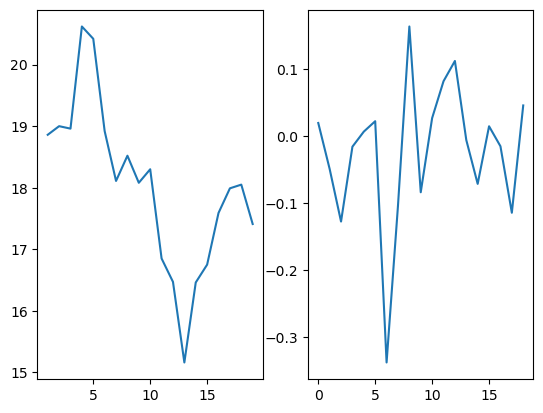

In [21]:
plt.subplot(1, 2, 1)
plt.plot(pre_stocks_100['MNSO']['Close'].reset_index(drop = True)[1:])
plt.subplot(1, 2, 2)
plt.plot(np.diff(xgb_clf.predict_proba(pre_stocks_100['ASC'][train_columns_rec])[:-1], axis = 1).squeeze())

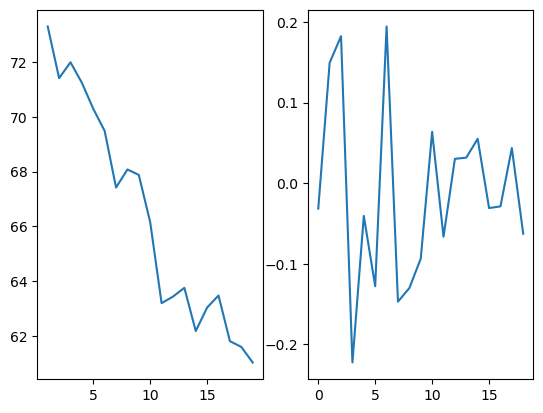

In [22]:
plt.subplot(1, 2, 1)
plt.plot(pre_stocks_100['TDW']['Close'].reset_index(drop = True)[1:])
plt.subplot(1, 2, 2)
plt.plot(np.diff(xgb_clf.predict_proba(pre_stocks_100['APA'][train_columns_rec])[:-1], axis = 1).squeeze())

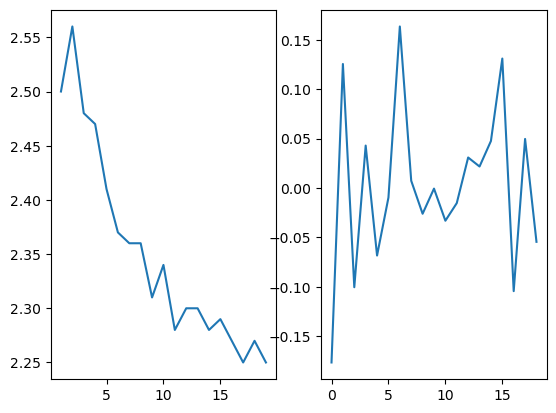

In [23]:
plt.subplot(1, 2, 1)
plt.plot(pre_stocks_100['ABEV']['Close'].reset_index(drop = True)[1:])
plt.subplot(1, 2, 2)
plt.plot(np.diff(xgb_clf.predict_proba(pre_stocks_100['ABEV'][train_columns_rec])[:-1], axis = 1).squeeze())

In [24]:
np.diff(xgb_clf.predict_proba(cur[train_columns_rec])[:-1], axis = 1).squeeze()

array([ 0.15918803, -0.02867559, -0.11159822,  0.20389664, -0.02691653,
        0.20700216,  0.06856179,  0.05317998,  0.24269176,  0.16253734,
       -0.01102483,  0.09089231,  0.06577456,  0.3563763 ,  0.11139643,
        0.12024045, -0.01356494,  0.01354313, -0.12459925], dtype=float32)